In [1]:
!pip3 install transformers
!pip3 install pandas
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
from matplotlib import style
import random

# style.use("dark_background")
seed_val = 994
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
device=torch.device("cuda:3")

In [2]:
train_df=pd.read_csv("./MELD/data/MELD/train_sent_emo.csv")
val_df=pd.read_csv("./MELD/data/MELD/dev_sent_emo.csv")
test_df=pd.read_csv("./MELD/data/MELD/test_sent_emo.csv")


train_df.head()




,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my company’s tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You must’ve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So let’s talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"


In [3]:


print(train_df.Emotion.unique())
print(len(train_df))


['neutral' 'surprise' 'fear' 'sadness' 'joy' 'disgust' 'anger']
9989


9989
1109
2610


<AxesSubplot:>

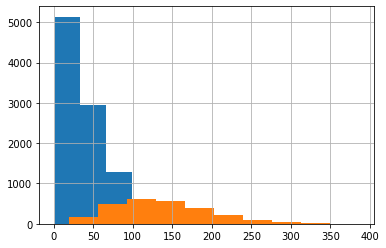

In [4]:
mapping ={'neutral':0, 'surprise':1, 'fear':2, 'sadness':3, 'joy':4, 'disgust':5, 'anger':6}

train_df=pd.read_csv("./MELD/data/MELD/train_sent_emo.csv")
val_df=pd.read_csv("./MELD/data/MELD/dev_sent_emo.csv")
test_df=pd.read_csv("./MELD/data/MELD/test_sent_emo.csv")

train_df=train_df.replace({"Emotion":mapping})# mapping labels to integer
val_df=val_df.replace({"Emotion":mapping})
test_df=test_df.replace({"Emotion":mapping})
past_window=2

train_text1=[]
val_text=[]
test_text=[]
# text=[i for i in train_df.iloc[:3]["Utterance"]]
# print(" [SEP] ".join(text))
for i in range(len(train_df)):
    if i<past_window:
        text=train_df.iloc[i]["Utterance"]
        train_text1.append(text)
    else:
         text= [i for i in train_df.iloc[i-past_window:i+1]["Utterance"]]
         train_text1.append(" </s> ".join(list(reversed(text))))
        
print(len(train_text1))        

for i in range(len(val_df)):
    if i<past_window:
        text=val_df.iloc[i]["Utterance"]
        val_text.append(text)
    else:
        text= [i for i in val_df.iloc[i-past_window:i+1]["Utterance"]]
        val_text.append(" </s> ".join(list(reversed(text))))
        
print(len(val_text))

for i in range(len(test_df)):
     if i<past_window:
        text=train_df.iloc[i]["Utterance"]
        test_text.append(text)
         
     else:
        text= [i for i in test_df.iloc[i-past_window:i+1]["Utterance"]]
        test_text.append(" </s> ".join(list(reversed(text))))
       
print(len(test_text)) 

train_text=train_df["Utterance"]
# val_text=val_df["Utterance"]
# test_text=test_df["Utterance"]


train_labels=train_df["Emotion"]
val_labels=val_df["Emotion"]
test_labels=test_df["Emotion"]

# # print(train_text,train_labels)

len_train=[len(j) for j in train_text]
len_test=[len(i) for i in test_text]

pd.Series(len_train).hist()
pd.Series(len_test).hist()

# print(train_df.Emotion.value_counts())



In [5]:
# train_text=train_text.tolist()
# print(train_text[len(train_df)])
print(train_text[9988])

 
    


That was a good one. For a second there, I was like, "whoa."


In [6]:
# for i in range(len(train_df)):
#     if i<past_window:
#         text=train_df.iloc[i]["Utterance"]
#         train_text1.append(text)
#     else:
#         text= [i for i in train_df.iloc[i-past_window:i]["Utterance"]]
#         train_text1.append("".join(text))
print(train_text1)        
print(len(train_text1))
train_text=train_text1
print(train_text[9988])

['also I was the point person on my company’s transition from the KL-5 to GR-6 system.', 'You must’ve had your hands full.', 'That I did. That I did. </s> You must’ve had your hands full. </s> also I was the point person on my company’s transition from the KL-5 to GR-6 system.', 'So let’s talk a little bit about your duties. </s> That I did. That I did. </s> You must’ve had your hands full.', 'My duties?  All right. </s> So let’s talk a little bit about your duties. </s> That I did. That I did.', 'Now you’ll be heading a whole division, so you’ll have a lot of duties. </s> My duties?  All right. </s> So let’s talk a little bit about your duties.', 'I see. </s> Now you’ll be heading a whole division, so you’ll have a lot of duties. </s> My duties?  All right.', 'But there’ll be perhaps 30 people under you so you can dump a certain amount on them. </s> I see. </s> Now you’ll be heading a whole division, so you’ll have a lot of duties.', 'Good to know. </s> But there’ll be perhaps 30 peop

In [7]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("roberta-large")
bert = AutoModel.from_pretrained("roberta-large")

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [8]:
tokens_train=tokenizer.batch_encode_plus(train_text,
                                         max_length=80*past_window,
                                         padding=True,
                                         truncation=True)
# tokens_train=tokenizer(train_text[3],
#                                          max_length=80*past_window,
#                                          padding=True,
#                                          truncation=True)
# print(tokens_train)
# print(tokenizer.decode(tokens_train["input_ids"]))

tokens_val=tokenizer.batch_encode_plus(val_text,
                                         max_length=80*past_window,
                                         padding=True,
                                         truncation=True)

tokens_test=tokenizer.batch_encode_plus(test_text,
                                         max_length=80*past_window,
                                         padding=True,
                                         truncation=True)

In [9]:
train_seq=torch.tensor(tokens_train["input_ids"])
train_mask=torch.tensor(tokens_train["attention_mask"])
train_label=torch.tensor(train_labels.tolist())

val_seq=torch.tensor(tokens_val["input_ids"])
val_mask=torch.tensor(tokens_val["attention_mask"])
val_label=torch.tensor(val_labels.tolist())

test_seq=torch.tensor(tokens_test["input_ids"])
test_mask=torch.tensor(tokens_test["attention_mask"])
test_label=torch.tensor(test_labels.tolist())

In [10]:
from torch.utils.data import DataLoader,TensorDataset,RandomSampler, SequentialSampler
batch_size=8

train_data=TensorDataset(train_seq,train_mask,train_label)
train_sampler=RandomSampler(train_data)
train_dataloader=DataLoader(train_data,sampler=train_sampler,batch_size=batch_size)

val_data=TensorDataset(val_seq,val_mask,val_label)
val_sampler=SequentialSampler(val_data)
val_dataloader=DataLoader(val_data,sampler=val_sampler,batch_size=batch_size)

test_data=TensorDataset(test_seq,test_mask,test_label)
test_sampler=SequentialSampler(test_data)
test_dataloader=DataLoader(test_data,sampler=test_sampler,batch_size=batch_size)

In [11]:
from tqdm.notebook import tqdm_notebook
# modules=[bert.encoder.layer[:1]]
# for module in modules:
#     for param in module.parameters():
#         param.requires_grad=False

# for name, param in list(bert.named_parameters())[:-79]: 
#     print('I will be frozen: {}'.format(name)) 
#     param.requires_grad = False


In [12]:
class BERT_model(nn.Module):
    def __init__(self,bert):
        super(BERT_model,self).__init__()
        
        self.bert=bert
        
        self.dropout=nn.Dropout(0.1)
        
        self.relu=nn.ReLU()
        
#         self.fc1=nn.Linear(768,512)
        
        self.fc2=nn.Linear(1024,7)
        
        self.softmax=nn.LogSoftmax(dim=1)
        
    def forward(self, sent_id ,mask):
        
        cls_hs=self.bert(sent_id,attention_mask=mask)[1]
        
#         x=self.fc1(cls_hs)
        
#         x=self.relu(x)
        
        x=self.dropout(cls_hs)
        
        x=self.fc2(x)

        
        x=self.softmax(x)
        
        return x

In [13]:
model=BERT_model(bert)

model=model.to(device)

In [14]:
# !pip install torch==1.5.0
from transformers import AdamW

optimizer=AdamW(model.parameters(),
                lr=1e-5)


In [15]:
from sklearn.utils.class_weight import compute_class_weight

# class_weights=compute_class_weight("balanced",np.unique(train_labels),train_labels)
# print(class_weights)

In [16]:
# weights=torch.tensor(class_weights,dtype=torch.float)

# weights=weights.to(device)

# cross_entropy=nn.NLLLoss(weight=weights)  #not using is better
cross_entropy=nn.NLLLoss()

epochs=5
from transformers import get_linear_schedule_with_warmup
# scheduler=get_linear_schedule_with_warmup(optimizer,num_warmup_steps=0.01*len(train_dataloader),num_training_steps=batch_size*epochs)

In [17]:
def train():
    model.train()
    
    total_loss,total_accuracy=0,0
    
    total_preds=[]
    
    for step,batch in tqdm_notebook(enumerate(train_dataloader),total=len(train_dataloader)):
        
            
        batch=[r.to(device) for r in batch]
        
        sent_id,mask,labels=batch

        model.zero_grad()
        
        preds=model(sent_id,mask)
        
        
        loss=cross_entropy(preds,labels)
        
        
        total_loss=total_loss+loss.item()
        
        
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(),1.0)
        
        
        optimizer.step()
#         scheduler.step()
        
        
        preds=preds.detach().cpu().numpy()
        total_preds.append(preds)
        
    avg_loss=total_loss/len(train_dataloader)
    
    total_preds=np.concatenate(total_preds,axis=0)
    
    
    return avg_loss,total_preds

In [18]:
def evaluate():
    print("\n Evaluating...")
     
    model.eval()
    
    total_loss,total_acc=0,0
    
    total_preds=[]
    
    for step,batch in tqdm_notebook(enumerate(val_dataloader),total=len(val_dataloader)):        
            
        batch=[r.to(device) for r in batch]
        
        sent_id,mask,labels=batch
        
        with torch.no_grad():
            
            preds=model(sent_id,mask)
            
            loss=cross_entropy(preds,labels)
            
            total_loss=total_loss + loss.item()
            
            preds=preds.detach().cpu().numpy()
            
            total_preds.append(preds)
            
    avg_loss=total_loss/len(val_dataloader)
    
    total_preds= np.concatenate(total_preds,axis=0)
    
    return avg_loss,total_preds

        
        

In [47]:
from sklearn.metrics import f1_score
best_val_loss=float("inf")

train_losses=[]
val_losses=[]

for epoch in range(epochs):
    print("\n For epoch{:}/{:}".format(epoch+1,epochs))
    
    train_loss,_=train()
    
    val_loss,val_preds_a=evaluate()

  
    print("shape",val_preds_a.shape)
    val_preds_a=np.argmax(val_preds_a, axis = 1)
    torch.save(model.state_dict(),"/mnt/elm/prakhar/research/bert_no_context/5utterance_roberta{:}.pt".format(epoch+1))
#     if val_loss<best_val_loss:
#         best_val_loss=val_loss
#         torch.save(model.state_dict(),"saved_weights-large-lossweight-40tok.pt")
        
    print("\n Training loss=",train_loss)
    print("\n Validation loss=",val_loss)
    print("Report for val")
#     print((val_labels))
    print(classification_report(val_labels,val_preds_a))
    print("f1 score", f1_score(val_labels,val_preds_a,average="weighted"))


 For epoch1/5


  0%|          | 0/1249 [00:00<?, ?it/s]


 Evaluating...


  0%|          | 0/139 [00:00<?, ?it/s]

shape (1109, 7)

 Training loss= 1.250595315169391

 Validation loss= 1.0708337483002985
Report for val
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       470
           1       0.63      0.63      0.63       150
           2       0.29      0.05      0.09        40
           3       0.65      0.27      0.38       111
           4       0.55      0.63      0.59       163
           5       0.36      0.23      0.28        22
           6       0.55      0.43      0.48       153

    accuracy                           0.64      1109
   macro avg       0.53      0.44      0.46      1109
weighted avg       0.62      0.64      0.61      1109

f1 score 0.6108735754886533

 For epoch2/5


  0%|          | 0/1249 [00:00<?, ?it/s]


 Evaluating...


  0%|          | 0/139 [00:00<?, ?it/s]

shape (1109, 7)

 Training loss= 0.970323376876531

 Validation loss= 1.0733000321997155
Report for val
              precision    recall  f1-score   support

           0       0.76      0.81      0.79       470
           1       0.59      0.53      0.56       150
           2       0.22      0.05      0.08        40
           3       0.59      0.40      0.47       111
           4       0.58      0.55      0.56       163
           5       0.39      0.32      0.35        22
           6       0.45      0.63      0.52       153

    accuracy                           0.63      1109
   macro avg       0.51      0.47      0.48      1109
weighted avg       0.62      0.63      0.62      1109

f1 score 0.6210347627594615

 For epoch3/5


  0%|          | 0/1249 [00:00<?, ?it/s]


 Evaluating...


  0%|          | 0/139 [00:00<?, ?it/s]

shape (1109, 7)

 Training loss= 0.7577419196418803

 Validation loss= 1.1357545513900922
Report for val
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       470
           1       0.56      0.77      0.65       150
           2       0.50      0.15      0.23        40
           3       0.50      0.46      0.48       111
           4       0.60      0.60      0.60       163
           5       0.29      0.27      0.28        22
           6       0.59      0.48      0.53       153

    accuracy                           0.65      1109
   macro avg       0.54      0.50      0.51      1109
weighted avg       0.65      0.65      0.64      1109

f1 score 0.6417673620582026

 For epoch4/5


  0%|          | 0/1249 [00:00<?, ?it/s]


 Evaluating...


  0%|          | 0/139 [00:00<?, ?it/s]

shape (1109, 7)

 Training loss= 0.5952655729860831

 Validation loss= 1.2559231520771124
Report for val
              precision    recall  f1-score   support

           0       0.72      0.84      0.77       470
           1       0.57      0.69      0.63       150
           2       0.37      0.17      0.24        40
           3       0.48      0.35      0.40       111
           4       0.64      0.54      0.59       163
           5       0.36      0.36      0.36        22
           6       0.64      0.49      0.56       153

    accuracy                           0.65      1109
   macro avg       0.54      0.49      0.51      1109
weighted avg       0.63      0.65      0.63      1109

f1 score 0.6320773734670275

 For epoch5/5


  0%|          | 0/1249 [00:00<?, ?it/s]


 Evaluating...


  0%|          | 0/139 [00:00<?, ?it/s]

shape (1109, 7)

 Training loss= 0.47073819579461884

 Validation loss= 1.626256835707229
Report for val
              precision    recall  f1-score   support

           0       0.67      0.87      0.76       470
           1       0.63      0.57      0.60       150
           2       0.38      0.23      0.28        40
           3       0.60      0.23      0.34       111
           4       0.59      0.50      0.54       163
           5       0.47      0.32      0.38        22
           6       0.57      0.53      0.55       153

    accuracy                           0.63      1109
   macro avg       0.56      0.46      0.49      1109
weighted avg       0.62      0.63      0.61      1109

f1 score 0.6100479625063491


In [19]:
path = '/mnt/elm/prakhar/research/bert_no_context/5utterance_roberta3.pt' #epoch3 best
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [20]:
torch.cuda.empty_cache()
total_preds=[]
with torch.no_grad():
  for step,batch in tqdm_notebook(enumerate(test_dataloader),total=len(test_dataloader)):        
            
        batch=[r.to(device) for r in batch]
        
        sent_id,mask,labels=batch
                
        preds=model(sent_id,mask)


        preds=preds.detach().cpu().numpy()

        total_preds.append(preds)
        
  total_preds= np.concatenate(total_preds,axis=0)

  print(total_preds)


  0%|          | 0/327 [00:00<?, ?it/s]

[[-0.05752667 -5.9463854  -5.4599233  ... -4.034594   -5.746523
  -4.1237288 ]
 [-0.06019998 -4.7729135  -5.4692583  ... -4.3047686  -6.279887
  -4.138561  ]
 [-0.02571936 -6.615873   -6.599567   ... -5.3371367  -5.546519
  -4.400697  ]
 ...
 [-2.066158   -3.4434965  -5.2836423  ... -2.1801667  -4.760657
  -0.39321586]
 [-2.8995228  -1.3882276  -1.7282743  ... -3.139358   -2.948112
  -1.6415448 ]
 [-0.08566532 -5.870292   -5.0074434  ... -3.5754876  -4.5476584
  -4.5067415 ]]


In [21]:
print(total_preds[0])

[-0.05752667 -5.9463854  -5.4599233  -4.425912   -4.034594   -5.746523
 -4.1237288 ]


In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
total_preds = np.argmax(total_preds, axis = 1)
print(mapping)
print("acc=",accuracy_score(test_labels,total_preds))
print(classification_report(test_labels, total_preds))
print("f1 score", f1_score(test_labels,total_preds,average="weighted"))

{'neutral': 0, 'surprise': 1, 'fear': 2, 'sadness': 3, 'joy': 4, 'disgust': 5, 'anger': 6}
acc= 0.635632183908046
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1256
           1       0.45      0.68      0.54       281
           2       0.27      0.18      0.22        50
           3       0.46      0.38      0.41       208
           4       0.60      0.62      0.61       402
           5       0.30      0.25      0.27        68
           6       0.52      0.42      0.47       345

    accuracy                           0.64      2610
   macro avg       0.48      0.47      0.47      2610
weighted avg       0.64      0.64      0.63      2610

f1 score 0.6329983310069476
